### <font color=darkred> Support Vector Machines in Python </font>

#### <font color=darkred> Hard Support Vector Machines with a simulated dataset </font>

In [1]:
"""""""""""""""""
Required packages
"""""""""""""""""
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import seaborn as sns

<font color=darkblue> 
Create a dataset with make_blobs containing 200 samples with 2 centers.<br>
Use sns.lmplot two draw the two clusters with a color for each label.<br>
The dataset is linearly separable, illustrate it by displaying a hyperplane classifier.
</font>

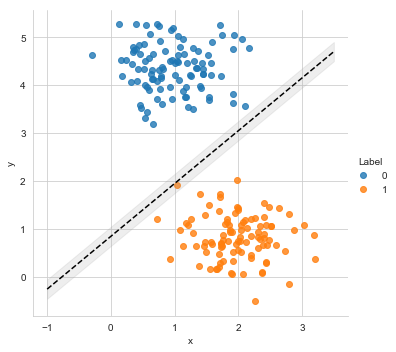

In [6]:
X, y = make_blobs(n_samples = 200, centers = 2, random_state = 0, cluster_std = 0.50)
simulated_data = pd.DataFrame(columns = ["X1","X2","Label"])

simulated_data["x"]     = X[:,0]
simulated_data["y"]     = X[:,1]
simulated_data["Label"] = y

# Use the 'Label' argument to provide a factor variable
sns.set_style("whitegrid")
sns.lmplot(x = "x", y = "y", data = simulated_data, fit_reg = False, hue = 'Label', legend = True)

slope  = 1.1
offset = 0.85
margin = 0.2

xfit = np.linspace(-1, 3.5)
yfit = slope * xfit + offset

plt.plot(xfit, yfit, '--k')
plt.fill_between(xfit, yfit - margin, yfit + margin, color = '#AAAAAA', alpha = 0.2)

<font color=darkblue> 
As the dataset is linearly separable, a hard SVM can be used to obtain a linear classifier<br>
The SVC provides a solution for the soft SVM which aims at solving:
$$\left\{
    \begin{array}{ll}
        (w,b)\in  \arg\min_{w\in \mathbb{R}^2,b\in\mathbb{R}}(\frac{1}{2}\|w\|^2 + C \sum_{i=1}^{n}\xi_i)\,, \\
        \ \xi_i \geqslant 0 \ \ \mathrm{for\,all}\, i \in \{1,\ldots,n\}\,, \\
        \ Y_i(<w,\phi(x_i)>) + b \geqslant  1-\xi_i
    \end{array}
\right.\,.
$$
For a chosen kernel $\phi$. The available kernels are:<br><br>
linear: $(x,y)\mapsto\langle x,y\rangle$ ;<br>
polynomial: $(x,y)\mapsto(\gamma\langle x,y\rangle + r)^d$, $d$ is specified by 'degree', $\gamma$ by 'coef0' ;<br>
rbf: $(x,y)\mapsto\mathrm{exp}(-\gamma\|x-y\|^2)$, $\gamma$ is specified by 'gamma' ;<br>
sigmoid: $(x,y)\mapsto\mathrm{tanh}(\gamma\langle x,y\rangle + r)$, $\gamma$ is specified by 'coef0'.<br>
    
Provide the Dual formulation of this problem.
</font>

<font color=darkblue> 
Use the SVC function with a linear kernel and a large parameter $C$.<br>
Learn the classifier using the fit function.<br>
Use decision_function and plt.contour to draw the hyperplane and its margin.
</font>

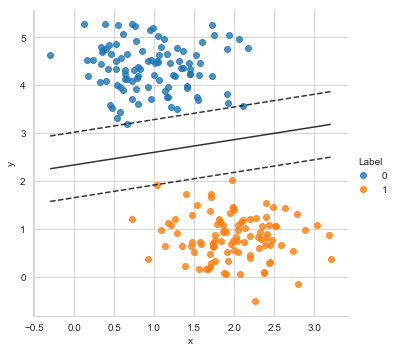

In [7]:
# Classification based on a support vector classifier
model = SVC(kernel='linear', C=10)
model.fit(X, y)
sns.set_style("whitegrid")
sns.lmplot(x = "x", y = "y", data = simulated_data, fit_reg = False, hue = 'Label', legend = True)

xlim  = [np.min(X[:,0]), np.max(X[:,0])]
ylim  = [np.min(X[:,1]), np.max(X[:,1])]
xplot = np.linspace(xlim[0], xlim[1], 30)
yplot = np.linspace(ylim[0], ylim[1], 30)

Yplot, Xplot = np.meshgrid(yplot, xplot)
xy           = np.vstack([Xplot.ravel(), Yplot.ravel()]).T
P            = model.decision_function(xy).reshape(Xplot.shape)
    
# plot decision boundary and margins
plt.contour(Xplot, Yplot, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.8, 
            linestyles = ['--', '-', '--'])

<font color=darkblue> 
Give the support vectors of the trained classifier.<br>
Display the support vectors in the previous plot.<br>
</font>

In [8]:
model.support_vectors_

array([[0.65446088, 3.19208575],
       [2.11114739, 3.57660449],
       [1.03992529, 1.92991009]])

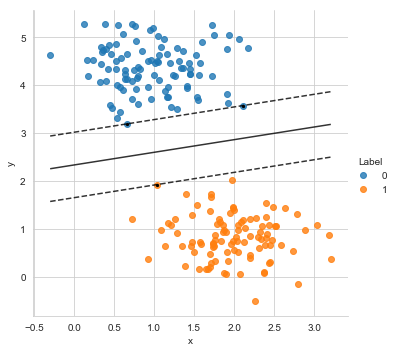

In [9]:
sns.set_style("whitegrid")
sns.lmplot(x = "x", y = "y", data = simulated_data, fit_reg = False, hue = 'Label', legend = True)
# plot decision boundary and margins
plt.contour(Xplot, Yplot, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.8, 
            linestyles = ['--', '-', '--'])
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 5, c = 'k');


<font color=darkblue> 
Sample a new training dataset with 'culster_std' larger than 1.<br>
Analyze the influence of 'C' on the estimated classifier.<br>
Provide an optimal choice of 'C' using Cross validation.
</font>

In [10]:
X, y = make_blobs(n_samples = 1000, centers = 2, random_state = 0, cluster_std = 1)

simulated_data = pd.DataFrame(columns = ["X1","X2","Label"])

simulated_data["x"]     = X[:,0]
simulated_data["y"]     = X[:,1]
simulated_data["Label"] = y

xlim  = [np.min(X[:,0]), np.max(X[:,0])]
ylim  = [np.min(X[:,1]), np.max(X[:,1])]
xplot = np.linspace(xlim[0], xlim[1], 30)
yplot = np.linspace(ylim[0], ylim[1], 30)

Yplot, Xplot = np.meshgrid(yplot, xplot)
xy           = np.vstack([Xplot.ravel(), Yplot.ravel()]).T

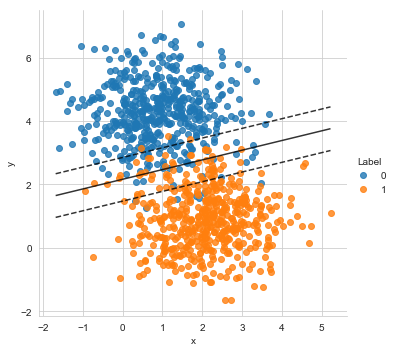

In [11]:
sns.set_style("whitegrid")
sns.lmplot(x = "x", y = "y", data = simulated_data, fit_reg = False, hue = 'Label', legend = True)
model = SVC(kernel='linear', C=.1)
model.fit(X, y)
P    = model.decision_function(xy).reshape(Xplot.shape)
plt.contour(Xplot, Yplot, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.8, linestyles = ['--', '-', '--'])

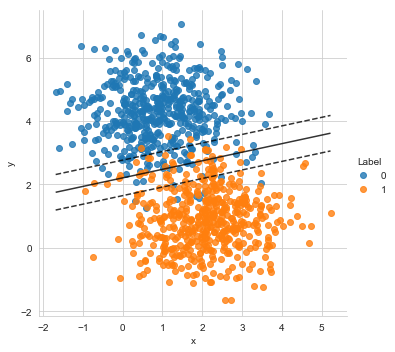

In [12]:
sns.set_style("whitegrid")
sns.lmplot(x = "x", y = "y", data = simulated_data, fit_reg = False, hue = 'Label', legend = True)
model = SVC(kernel='linear', C = 10)
model.fit(X, y)
P    = model.decision_function(xy).reshape(Xplot.shape)
plt.contour(Xplot, Yplot, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.8, linestyles = ['--', '-', '--'])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test) 

0.9425

<font color=darkred> 
Kernel based SVM
</font>

<font color=darkblue> 
Create a dataset with make_circles containing 500 samples.<br>
Perform a kernel based SVM using a 'rbf' kernel. Check the influence of 'gamma'.
</font>

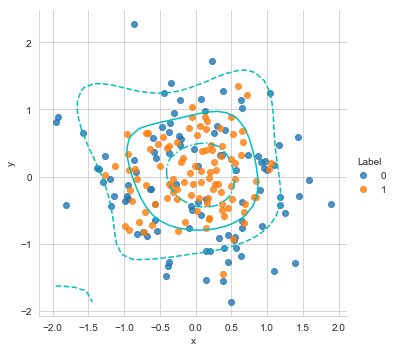

In [18]:
X, y = make_circles(200, factor=.1, noise=.5)

clf_gauss = SVC(kernel='rbf', gamma = .1).fit(X, y)
clf_gauss2 = SVC(kernel='rbf', gamma = 1).fit(X, y)
clf_gauss3 = SVC(kernel='rbf', gamma = 20).fit(X, y)

simulated_data = pd.DataFrame(columns = ["X1","X2","Label"])

simulated_data["x"]     = X[:,0]
simulated_data["y"]     = X[:,1]
simulated_data["Label"] = y

xlim  = [np.min(X[:,0]), np.max(X[:,0])]
ylim  = [np.min(X[:,1]), np.max(X[:,1])]
xplot = np.linspace(xlim[0], xlim[1], 30)
yplot = np.linspace(ylim[0], ylim[1], 30)

Yplot, Xplot = np.meshgrid(yplot, xplot)
xy           = np.vstack([Xplot.ravel(), Yplot.ravel()]).T

sns.set_style("whitegrid")
sns.lmplot(x = "x", y = "y", data = simulated_data, fit_reg = False, hue = 'Label', legend = True)

P_gauss = clf_gauss.decision_function(xy).reshape(Xplot.shape)
P_gauss2 = clf_gauss2.decision_function(xy).reshape(Xplot.shape)
P_gauss3 = clf_gauss3.decision_function(xy).reshape(Xplot.shape)
#plt.contour(Xplot, Yplot, P_gauss, colors = 'k', levels = [-1, 0, 1], alpha = 1, linestyles = ['--', '-', '-.'])
plt.contour(Xplot, Yplot, P_gauss2, colors = 'c', levels = [-1, 0, 1], alpha = 1, linestyles = ['--', '-', '-.'])
#plt.contour(Xplot, Yplot, P_gauss3, colors = 'r', levels = [-1, 0, 1], alpha = 1, linestyles = ['--', '-', '-.'])

<font color=darkblue> 
Create a trainning dataset containing 70% of the data.<br>
Display the performance of a 'rbf' based SVM  using difference metrics: accuracy, precision, recall.
</font>

In [21]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

#Create a svm Classifier
clf = SVC(kernel='rbf', gamma = 1) 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.6666666666666666
Precision: 0.6388888888888888
Recall: 0.7666666666666667


<font color=darkblue> 
Plot the performance of the SVM classifier as a function of gamma using cross validation.
</font>

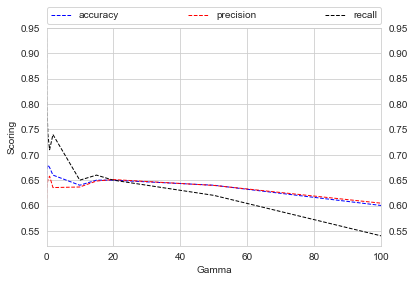

In [23]:
gammas = [0.1,0.2, 0.5, 1, 2, 10, 15, 20, 50, 100]
scores = np.zeros((3,np.size(gammas)))
i      = 0
for g in gammas:
    k = 0 
    for score in ["accuracy", "precision", "recall"]:
        clf = SVC(kernel='rbf', gamma = g)
        scores[k,i] = np.mean(cross_val_score(clf, X, y, scoring = score, cv = 5))
        k = k + 1
    i = i + 1
plt.plot(gammas,scores[0,:],color='blue', linestyle='dashed', linewidth=1, label = 'accuracy')
plt.plot(gammas,scores[1,:],color='red', linestyle='dashed', linewidth=1, label = 'precision')
plt.plot(gammas,scores[2,:],color='black', linestyle='dashed', linewidth=1, label = 'recall')
plt.tick_params(labelright=True)
plt.grid(True)
plt.xlim(gammas[0], gammas[-1])
plt.ylabel('Scoring',fontsize=10)
plt.xlabel('Gamma',fontsize=10)
plt.legend(bbox_to_anchor=(0.,1.02,1.,.102), mode="expand", ncol = 3, loc=3,borderaxespad=0.)

<font color=darkred> 
Kernel based SVM for a real learning application: well-veing at work
</font>

<font color=darkblue> 
Import wellbeeingatwork_input.csv and wellbeeingatwork_output.csv with pd.read_csv.<br>
Display the empirical distribution of the scores and pairwise scatter plots with scatter_matrix.<br>
What can be concluded on the covariates ?
</font>

In [45]:
input_data = pd.read_csv('wellbeeingatwork_input.csv')
input_data = input_data.fillna(method='ffill')
input_data = input_data.fillna(method='bfill')
input_data.head()

,ID,Date,Temperature,Humidity,Humex,CO2,Bright
0,0,2018-06-17 04:20:00,25.0,40.0,26.5,519.0,1.0
1,1,2018-03-20 03:40:00,19.1,26.0,16.7,607.0,1.0
2,2,2018-07-22 17:20:00,29.3,48.0,34.7,326.0,0.0
3,3,2018-04-08 00:30:00,25.1,37.0,26.1,641.0,1.0
4,4,2018-04-21 03:20:00,25.1,36.0,25.9,572.0,1.0


In [46]:
labels = pd.read_csv('wellbeeingatwork_output.csv')
labels = labels.fillna(method='ffill')
labels.head()

,ID,Score
0,0,3.0
1,1,2.0
2,2,3.0
3,3,4.0
4,4,3.0


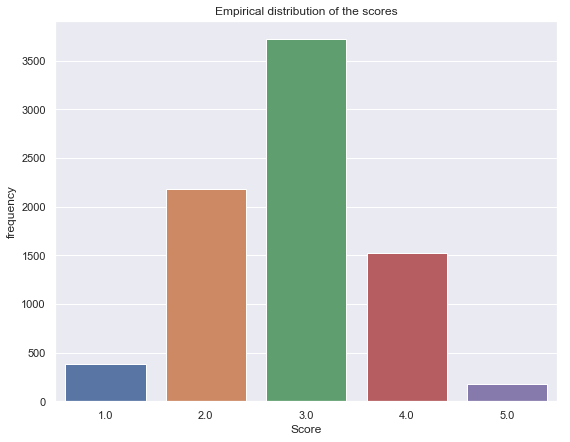

In [47]:
plt.figure(figsize=(9,7))
sns.countplot(x = "Score", data = labels)
plt.ylabel('frequency')
plt.xlabel('Score')
plt.title("Empirical distribution of the scores")
plt.show()

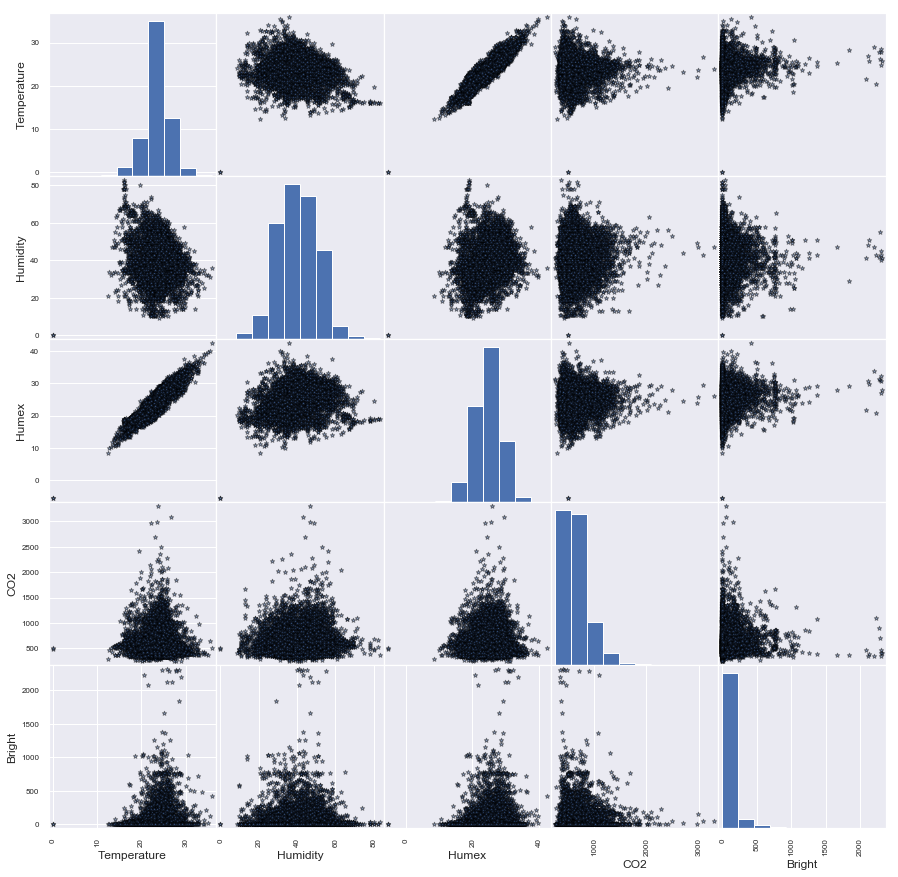

In [48]:
pd.plotting.scatter_matrix(input_data.loc[:,["Temperature","Humidity","Humex","CO2","Bright"]],
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 20,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

<font color=darkblue> 
Split the dataset using 70% of the observations to train the classifier.<br>
Display the score of the trained classifier using test data.
</font>

In [ ]:
X_classif = input_data.drop(['Humex','Date','Bright'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_classif, labels["Score"].values, test_size=0.3, random_state=32)

classifier = SVC(kernel='poly') 
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

print('SVM accuracy: ')
np.mean(y_predicted == y_test)

C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


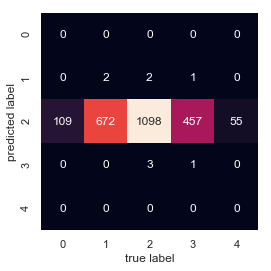

In [56]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

<font color=darkred> 
SVM for a real learning application: breast cancer dataset
</font>

In [41]:
from sklearn import datasets
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
#Load dataset
cancer = datasets.load_breast_cancer()
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109)


Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [42]:
#Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [43]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629
